In [28]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Se levanta el set de train generado

In [29]:
data_set = pd.read_csv("train_set.csv")
X = data_set.loc[:, data_set.columns != 'precio']
y = data_set.loc[:, ['precio']]

In [30]:
data_set.columns

Index(['Unnamed: 0', 'id', 'precio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'antiguedad',
       'metrostotales', 'metroscubiertos', 'garages', 'banos', 'lat', 'lng',
       'tipodepropiedad_1', 'tipodepropiedad_2', 'tipodepropiedad_3',
       'tipodepropiedad_4', 'tipodepropiedad_5', 'tipodepropiedad_6',
       'tipodepropiedad_7', 'tipodepropiedad_8', 'tipodepropiedad_9',
       'tipodepropiedad_10', 'tipodepropiedad_11', 'tipodepropiedad_12',
       'tipodepropiedad_13', 'tipodepropiedad_14', 'tipodepropiedad_15',
       'tipodepropiedad_16', 'tipodepropiedad_17', 'tipodepropiedad_18',
       'tipodepropiedad_19', 'tipodepropiedad_20', 'tipodepropiedad_21',
       'tipodepropiedad_22', 'tipodepropiedad_23', 'tipodepropiedad_24',
       'provincia_1', 'provincia_2', 'provincia_3', 'provincia_4',
       'provincia_5', 'provincia_6', 'provincia_7', 'provincia_8',
       'provincia_9', 'provincia_10', 'provincia_11', 'provincia_12',
       '

# Se separa en train y en test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [32]:
len(X_train)

179965

In [33]:
len(X_test)

59989

# Se define y entrena el modelo con el set de train 

In [34]:
model_RF = RandomForestRegressor(n_estimators = 30, max_depth = 9, min_samples_split = 2 ,max_features = "auto")
model_RF.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Encontrado max_depth = 9. A partir de ahi el modelo comienza a overfittear

Min_sample_split pareciese que no cambia nada por ahora. Lo dejo en default (=2) por ahora

### Aca tambien deberia hacerse la busqueda de hiperparametros (creo...)

# Se calcula la prediccion del set de test y del set de entrenamiento tambien

In [35]:
pred_train = model_RF.predict(X_train)

In [36]:
pred_test = model_RF.predict(X_test)

# Se evaluan ambas predicciones

## Como metrica se utiliza RMSLE

In [37]:
rmsle_train = np.sqrt(sklearn.metrics.mean_squared_log_error(y_train, pred_train))
rmsle_test = np.sqrt(sklearn.metrics.mean_squared_log_error(y_test, pred_test))
print(f"RMSLE train: {rmsle_train:.5f}")
print(f"RMSLE test: {rmsle_test:.5f}")

RMSLE train: 0.44971
RMSLE test: 0.45969


# Importancia de features

In [42]:
model_RF.feature_importances_

array([4.58643961e-02, 1.90816923e-03, 6.70075839e-04, 7.62889246e-04,
       1.04578221e-04, 1.49415668e-04, 4.98503208e-03, 4.69692330e-02,
       4.65063814e-01, 5.86112399e-03, 8.76776185e-02, 1.53155903e-01,
       4.76603401e-02, 1.39788572e-04, 6.37224245e-05, 1.11962431e-04,
       1.29435763e-04, 2.61657478e-05, 0.00000000e+00, 8.33708833e-06,
       1.47824493e-09, 0.00000000e+00, 3.02731391e-05, 6.09209993e-05,
       1.24690600e-05, 0.00000000e+00, 0.00000000e+00, 5.43398525e-05,
       0.00000000e+00, 1.74570605e-04, 4.69267196e-05, 1.26024702e-04,
       5.39846138e-05, 6.25442983e-06, 3.93717219e-05, 0.00000000e+00,
       0.00000000e+00, 9.68197563e-05, 3.26817631e-05, 5.99750687e-05,
       4.30603313e-05, 4.25976246e-05, 1.05272207e-04, 2.58177797e-04,
       1.05149162e-05, 7.77047656e-05, 4.41051465e-05, 9.74588728e-05,
       7.98211321e-05, 3.62861879e-05, 9.11152659e-05, 1.06938505e-04,
       6.31420062e-05, 8.43336692e-05, 4.23008419e-05, 1.21918997e-04,
      

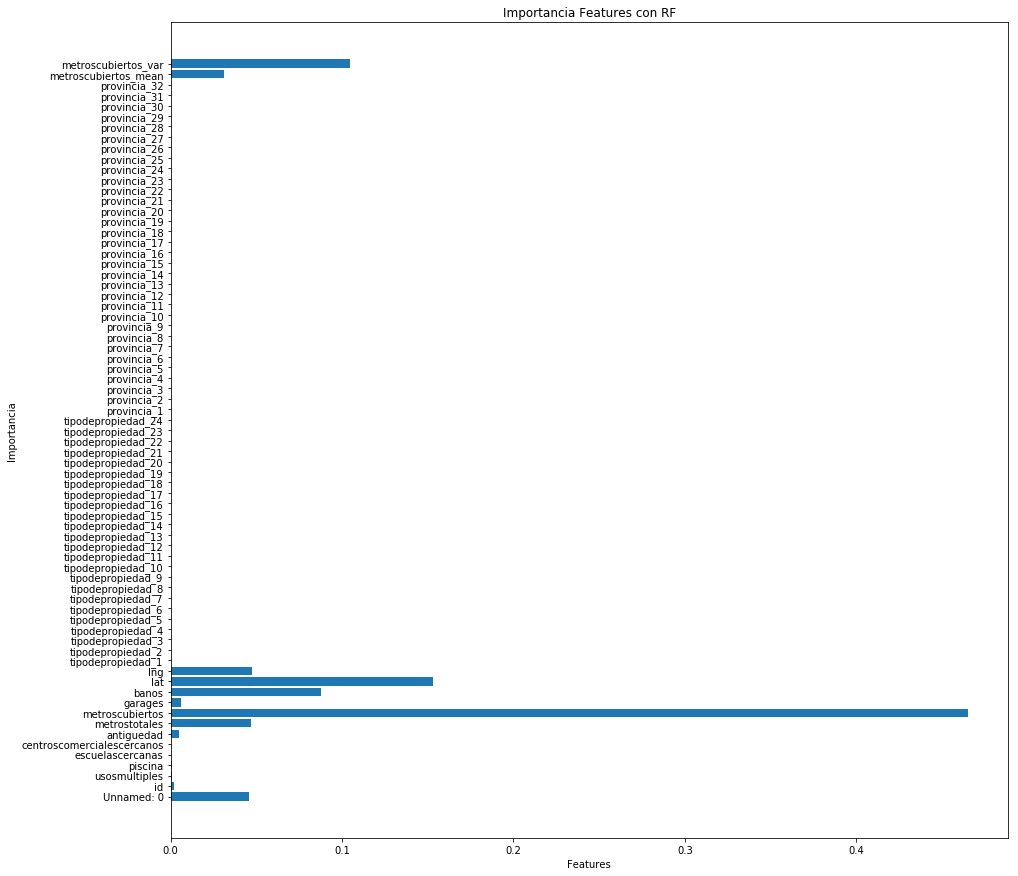

In [43]:
plt.figure(figsize = (15,15))
plt.barh(X_train.columns, model_RF.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

Metroscubiertos es lo unico que me importa para calcular el precio... Lo de mas casi que no es relevante.